In [ ]:

import numpy as np
import pandas as pd
from scipy.stats import norm, invgamma, beta, gamma, invwishart, expon
import scipy.stats
from matplotlib import pyplot as plt
from google.colab import drive
import math
import seaborn as sns
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


# Load database

In [ ]:
df_clean =  pd.read_csv('/gdrive/MyDrive/MLDM Project/data/PGM/X_station_day.csv')
display(df_clean)

,station_id,year,month,day,latitude,longitude,altitude,wind_direction,wind_speed,temperature,humidity,dew_point,precipitations,ground_truth
0,14066001,2016,1,1,49.334,-0.431,2,146.50000,3.913750,280.33374,88.591670,278.51460,0.2,3.4
1,14066001,2016,1,2,49.334,-0.431,2,205.62500,8.041250,282.93668,82.300000,279.99750,3.4,11.7
2,14066001,2016,1,3,49.334,-0.431,2,195.25000,5.430417,281.10165,86.604164,278.99750,11.7,0.6
3,14066001,2016,1,4,49.334,-0.431,2,212.66667,6.715417,281.05500,80.645836,277.90082,0.6,0.4
4,14066001,2016,1,5,49.334,-0.431,2,205.04167,5.957083,281.25583,82.750000,278.48416,0.4,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82115,95690001,2017,12,26,49.108,1.831,126,202.33333,7.699167,279.04166,85.587500,276.80000,2.4,3.2
82116,95690001,2017,12,27,49.108,1.831,126,251.50000,8.134167,277.27457,86.275000,275.16043,3.2,0.0
82117,95690001,2017,12,28,49.108,1.831,126,253.58333,3.172500,275.01960,86.816666,273.01460,0.0,4.4
82118,95690001,2017,12,29,49.108,1.831,126,211.50000,6.341250,277.45250,86.637500,275.34125,4.4,5.4


In [ ]:
N = len(df_clean)

In [ ]:
df_clean.columns

Index(['year', 'month', 'day', 'latitude', 'longitude', 'altitude',
       'wind_direction', 'wind_speed', 'temperature', 'humidity', 'dew_point',
       'precipitations', 'ground_truth'],
      dtype='object')

# Gibbs Sampling 1D

I tried to find parameters on a exponential distribution because I find that the precipitation looks like an exponential distribution, without success

help page 13 : http://www2.stat.duke.edu/~rcs46/modern_bayes17/lecturesModernBayes17/lecture-7/07-gibbs.pdf

So i stay focus on gaussian distribution

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


Resultat =  [117.81151797 688.74432088]
[2.10806471e-06 2.10806471e-06 2.10806470e-06 ... 2.10772790e-06
 2.10772789e-06 2.10772789e-06]


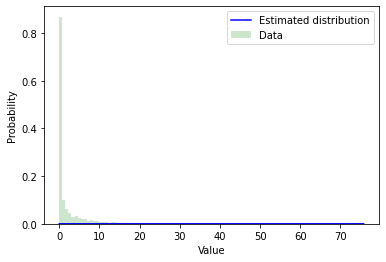

In [ ]:

def gibbs_sampling1D_exponential(X):
  n_iter = 100
  result = np.zeros( (n_iter, 2) ) #2 : a and b
  result[0] = [0.25,0.25] # random 
  for i in range(2,n_iter):

    a = expon.rvs(X[i],scale= (result[i-1,1]))
    b = gamma.rvs(5+1,scale=1/result[i-1,0]+100)

    result[i]=[a,b]
    
  return result
  

X = df_clean['precipitations']
res = gibbs_sampling1D_exponential(X)
print("Resultat = ",res[-1])


lamb = res[-1,0]*res[-1,1]
plt.figure()
xx = np.linspace(min(X),max(X),num=len(X))
yy = expon.pdf(xx,loc=0, scale=(res[-1,1]*res[-1,1]))

print(yy)
plt.hist(X,color='g', bins=100, density=True, alpha = 0.2, label = 'Data')
plt.plot(xx, yy, color = 'b', label = 'Estimated distribution')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.legend()
plt.show()

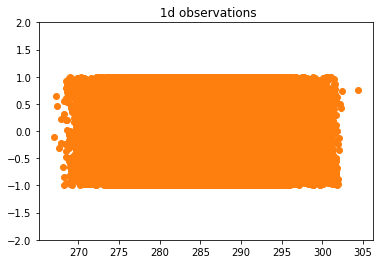

mean =  284.8545912456138
sigma =  5.685851495010559


In [ ]:
X = df_clean['temperature']
N = len(X)
# print(X[:;0])
# Look at the data
plt.scatter([],[])
plt.scatter(X[:], np.random.uniform(-1, 1, (N)))
plt.ylim(-2, 2)
plt.title(" 1d observations")
plt.show()
print("mean = ",X.mean())
print("sigma = ",X.std())

In [453]:
def gibbs_sampling1D(X):
  N = len(X)

  list_of_mean = list()
  list_of_std = list()

  # Random mean
  mu = 0
  list_of_mean.append(mu)

  nb_iter = 2000
  # Gibbs Sampling

  for _ in range(nb_iter):
      # Update var with mu
    var = invgamma.rvs(N/2 - 1, 0, np.sum((X-mu)**2)/2)

      # Update mean
    mu = norm.rvs(np.mean(X), var / N**0.5)

    list_of_mean.append(mu)
    list_of_std.append(math.sqrt(var))
  print("result mu, sigma",list_of_mean[-1],list_of_std[-1])
  return list_of_mean,list_of_std



In [451]:
def plot_gibbs_sampling1D(list_of_mean,list_of_std):
  plt.figure()
  plt.plot(list_of_mean)
  plt.xlabel('Iteration')
  plt.ylabel('Mean')

  plt.figure()
  plt.plot(list_of_std)
  plt.xlabel('Iteration')
  plt.ylim(8,14)
  plt.ylabel('Standard deviation')


  plt.figure()
  xx = np.linspace(list_of_mean[-1]-3*list_of_std[-1],list_of_mean[-1]+3*list_of_std[-1],100)
  yy = norm.pdf(xx, loc=list_of_mean[-1], scale=list_of_std[-1])
  plt.hist(X,color='g', bins=100, density=True, alpha = 0.2, label = 'Data')
  plt.plot(xx, yy, color = 'b', label = 'Estimated distribution')
  plt.axvline(x=list_of_mean[-1],color='r')
  plt.xlim(list_of_mean[-1]-50,list_of_mean[-1]+50)
  plt.xlabel('Value')
  plt.ylabel('Probability')
  plt.legend()
  plt.show()




base mean = 284.8545912456138
base_stdev = 5.685851495010559
result mu, sigma 284.705808103023 5.697123747845922


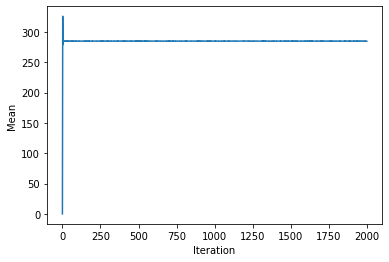

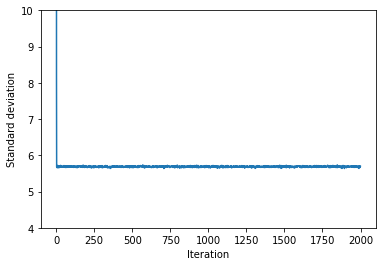

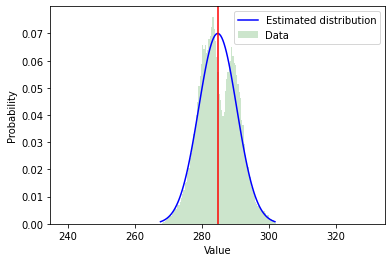

In [447]:
X = df_clean['temperature']
list_of_mean,list_of_std = gibbs_sampling1D(X)
plot_gibbs_sampling1D(list_of_mean,list_of_std)


base mean = 281.3384326016818
base_stdev = 5.0144666481596705
result mu, sigma 281.2709884728504 5.011944922029417


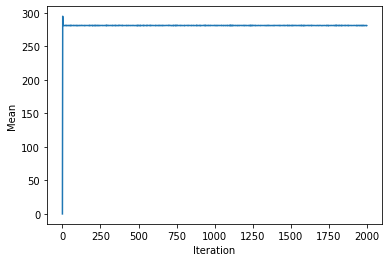

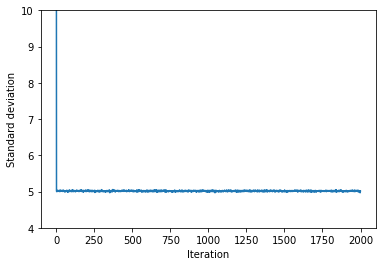

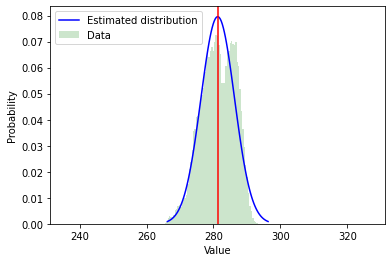

In [448]:
X = df_clean['dew_point']
list_of_mean,list_of_std = gibbs_sampling1D(X)
plot_gibbs_sampling1D(list_of_mean,list_of_std)



result mu, sigma 80.94832586917438 9.776324376659673


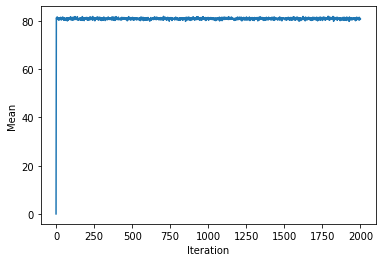

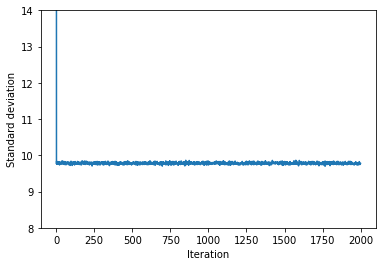

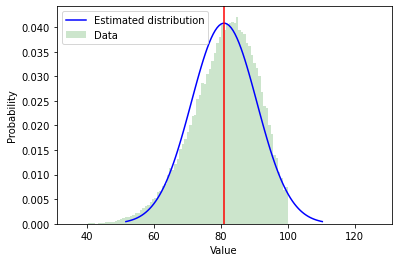

In [454]:
X = df_clean['humidity']
list_of_mean,list_of_std = gibbs_sampling1D(X)
plot_gibbs_sampling1D(list_of_mean,list_of_std)



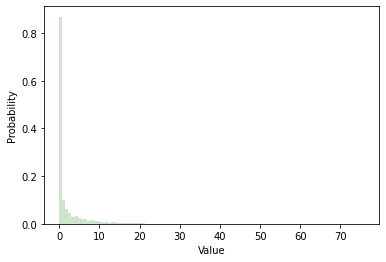

base mean = 1.9503957726704964
base_stdev = 4.183222491172651
1.925197999133333
4.197819845161335


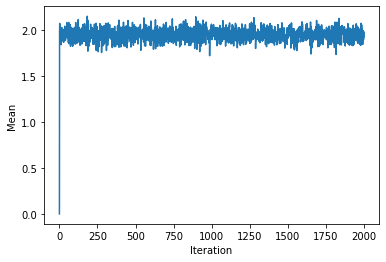

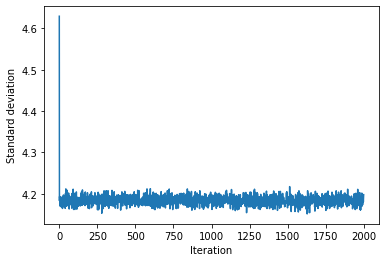

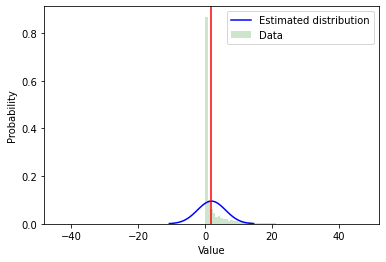

In [ ]:
X = df_clean['precipitations']
list_of_mean,list_of_std = gibbs_sampling1D(X)
plot_gibbs_sampling1D(list_of_mean,list_of_std)

I tried to find parameters on 2 gaussian because i think dew point and temperature have 2 gaussians on their distribution

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
def my_kmeans(data):
  X = df_clean[data].values.reshape(-1, 1)

  kmeans = KMeans(init="random",n_clusters=2,n_init=10, max_iter=300,
  random_state=42)

  kmeans.fit(X)
  index1 = np.where(kmeans.labels_==0)
  index2 = np.where(kmeans.labels_==1)
  return X,index1,index2

In [ ]:
X_temp,index1_temp,index2_temp = my_kmeans("temperature")
X_dp,index1_dp,index2_dp= my_kmeans("dew_point")





In [356]:
def gibbs_sampling2G(X,index1,index2):
  N = len(X)

  N1 = len(X[index1])
  N2 = len(X[index2])

  mu1 = 200
  base_stdev2 = 2
  mu2 = 300
  base_stdev2 = 3

  list_of_mean1 = list()
  list_of_mean2 = list()
  list_of_std1 = list()
  list_of_std2 = list()

  # Random mean
  list_of_mean1.append(mu1)
  list_of_mean2.append(mu2)

  nb_iter = 2000
  # Gibbs Sampling

  for _ in range(nb_iter):
      # Update var with mu
    var1 = invgamma.rvs(N/2 - 1, 0, np.sum((X-mu1)**2)/2)
    var2 = invgamma.rvs(N/2 - 1, 0, np.sum((X-mu2)**2)/2)

      # Update mean
    mu1 = norm.rvs(np.mean(X[index1]), var1 / N**0.5)
    mu2 = norm.rvs(np.mean(X[index2]), var2 / N**0.5)

    list_of_mean1.append(mu1)
    list_of_mean2.append(mu2)
    list_of_std1.append(math.sqrt(var1))
    list_of_std2.append(math.sqrt(var2))
  print("result mu, sigma",list_of_mean1[-1],list_of_std1[-1])
  print("result mu, sigma",list_of_mean2[-1],list_of_std2[-1])
  return list_of_mean1,list_of_std1,list_of_mean2,list_of_std2

In [ ]:
def plot_2Gaussian(X, list_of_mean1,list_of_std1,list_of_mean2,list_of_std2,data):
  print("-----------------------------",data,"-----------------------------")
  plt.figure()
  xx1 = np.linspace(list_of_mean1[-1]-3*list_of_std1[-1],list_of_mean1[-1]+3*list_of_std1[-1],100)
  plt.plot(xx1, norm.pdf(xx1, list_of_mean1[-1], list_of_std1[-1]),label = 'Estimated distribution 1')

  xx2 = np.linspace(
  list_of_mean2[-1]-3*list_of_std2[-1],list_of_mean2[-1]+3*list_of_std2[-1],100)
  plt.plot(xx2, norm.pdf(xx2, list_of_mean2[-1], list_of_std2[-1]),label = 'Estimated distribution 2')

  plt.hist(X,color='g', bins=100, density=True, alpha = 0.2, label = 'Data')

  plt.axvline(x=list_of_mean1[-1],color='r')
  plt.axvline(x=list_of_mean2[-1],color='g')
  # ax = plt.gca()
  # plt.xlim(list_of_mean[-1]-50,list_of_mean[-1]+50)
  plt.xlabel('Value')
  plt.ylabel('Probability')
  plt.legend()
  
  plt.show()

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
result mu, sigma 290.1424236918728 7.901909970753674
result mu, sigma 280.19696483333126 7.1706889590445835
----------------------------- temperature -----------------------------


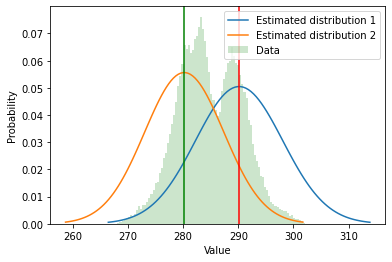

result mu, sigma 285.3851569122506 6.454462145830515
result mu, sigma 277.1273719487625 6.7495738984815965
----------------------------- dew point -----------------------------


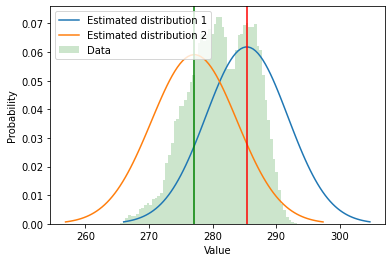

In [ ]:
print(type(X))
print(type(X1))

list_of_mean1,list_of_std1,list_of_mean2,list_of_std2 = gibbs_sampling2G(X_temp,index1_temp,index2_temp)
plot_2Gaussian(X_temp, list_of_mean1,list_of_std1,list_of_mean2,list_of_std2,"temperature")

list_of_mean1,list_of_std1,list_of_mean2,list_of_std2 = gibbs_sampling2G(X_dp,index1_dp,index2_dp)
plot_2Gaussian(X_dp, list_of_mean1,list_of_std1,list_of_mean2,list_of_std2,"dew point")

# Gibbs Sampling Sampling data

In [434]:
def gibbs_sampling(init, n, mean, cov):

  result = np.empty([n+1, 2])
  tmp = np.empty([n+1, 2])
  init = init
  result[0] = init
  new_point = init
  for i in range(1,n):

    # p(x_0|x_1)
    mu = mean[0] + (cov[0,1] * (new_point[1] - mean[1]))/cov[1,1]
    sigma = np.sqrt(cov[0, 0]-(cov[0,1]**2)/cov[1,1])
    new_point[0] = np.random.randn()*sigma + mu

    # p(x_1|x_0)
    mu = mean[1] + (cov[1,0] * (new_point[0] - mean[0]))/cov[0,0]
    sigma = np.sqrt(cov[1, 1]-(cov[1,0]**2)/cov[0,0])
    new_point[1] = np.random.randn()*sigma + mu

    result[i]=new_point
  return result


def plot_samples(samples,X1,X2, title):
    

In [ ]:
print(df_clean.columns)

Index(['station_id', 'year', 'month', 'day', 'latitude', 'longitude',
       'altitude', 'wind_direction', 'wind_speed', 'temperature', 'humidity',
       'dew_point', 'precipitations', 'ground_truth'],
      dtype='object')


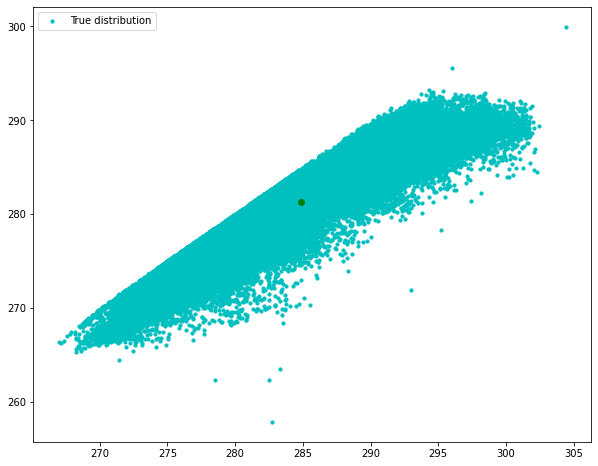

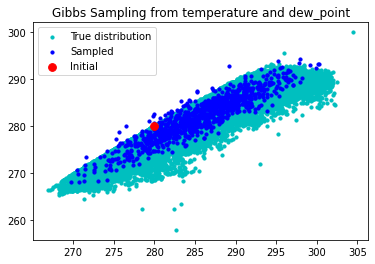

In [437]:
def init_gibbs_sampling(x,y,first):
  X1 = df_clean[x]
  X2 = df_clean[y]

  mean = np.array([X1.mean(), X2.mean()])
  X_cov = np.stack((X1, X2), axis=0)
  cov = np.cov(X_cov)

  fig = plt.figure(figsize=(10, 8))
  ax = fig.gca()
  ax.scatter(X1, X2, c='c', s=10, label="True distribution")
  ax.scatter(mean[0], mean[1], c='g')
  ax.legend(loc='upper left')
  plt.show()
  

  # how many sampled points we want
  n = 1000

  #Gibbs sampler
  samples = gibbs_sampling(first, n, mean, cov)

  #Plot
  titre = "Gibbs Sampling from "+str(x)+" and "+str(y)
  fig = plt.figure()
  ax = fig.gca()
  plt.title(titre)
  ax.scatter(X1, X2, c='c', s=10, label="True distribution")
  ax.scatter(samples[:-1, 0], samples[:-1, 1], c='b', s=10, label="Sampled")
  ax.scatter(samples[0, 0], samples[0, 1], marker='o', c='r', s=60, label="Initial")
  
  plt.legend()


first = [280, 280]
init_gibbs_sampling("temperature","dew_point",first)



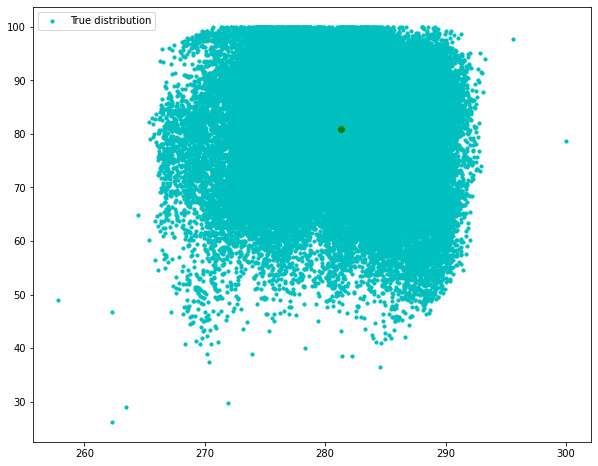

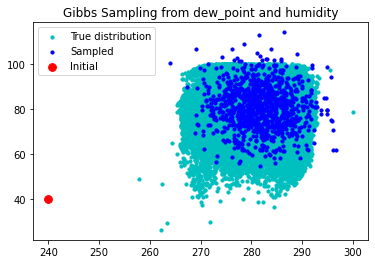

In [438]:
      #   'latitude', 'longitude',
      #  'altitude', 'wind_direction', 'wind_speed', 'temperature', 'humidity',
      #  'dew_point', 'precipitations', 'ground_truth'

first = [240,40]
init_gibbs_sampling("dew_point","humidity",first)

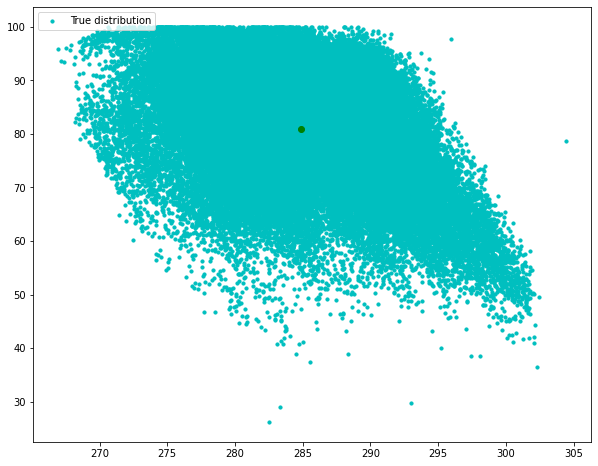

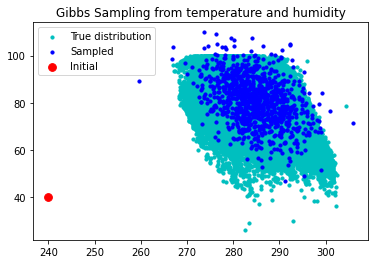

In [439]:
first = [240,40]
init_gibbs_sampling("temperature","humidity",first)

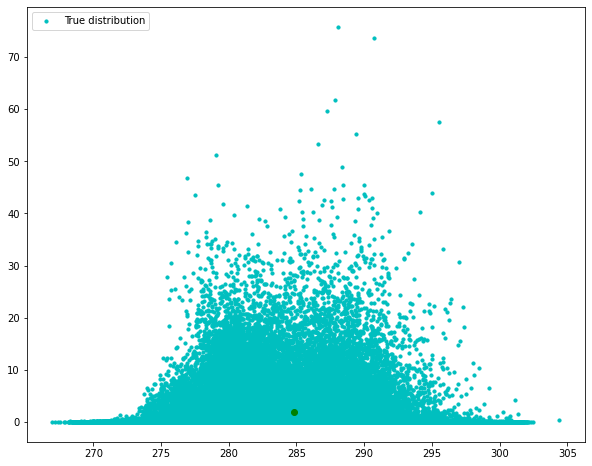

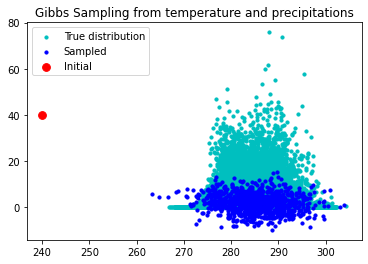

In [440]:
first = [240,40]
init_gibbs_sampling("temperature","precipitations",first)